# Estudo de Caso: Classificação de Tipos de Vinho
## Introdução
O objetivo deste estudo de caso é criar um modelo de *Machine Learning* que possa classificar tipos de vinho com base em características químicas. Utilizaremos conceitos de treino e teste de modelos, validação, *overfitting*, *underfitting* e matriz de confusão.

## O Dataset
O dataset "Wine" contém 178 amostras de três tipos diferentes de vinho, com 13 características químicas, como teor alcoólico, ácido málico, cinzas, alcalinidade das cinzas, magnésio, fenóis totais, flavonoides, entre outras.

## Passo 1: Preparação dos Dados
Vamos importar as bibliotecas, carregar e explorar o *dataset.*

In [1]:
# Importar as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Carregar o dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
columns = ['class', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
           'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins',
           'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
wine = pd.read_csv(url, header=None, names=columns)

# Explorar o dataset
print(wine.head())
print(wine.describe())

   class  alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   color_intensity   hue  od280/od315_of_diluted_wines  proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05  

## Passo 2: Pré-processamento dos Dados
Vamos dividir os dados em conjuntos de treino e teste, e padronizar os dados.

In [3]:
# Dividir os dados em treino e teste
X = wine.drop('class', axis=1)
y = wine['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Passo 3: Treinamento do Modelo
Vamos treinar um modelo de Regressão Logística e verificar a sua performance.

Acurácia: 0.9814814814814815
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      0.95      0.98        21
           3       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



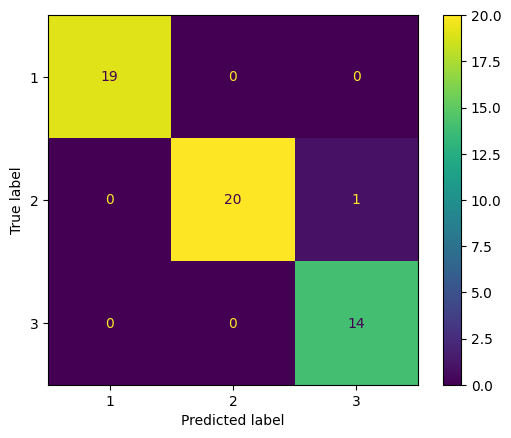

In [4]:
# Treinar o modelo
model = LogisticRegression(max_iter=200)
model.fit(X_train_scaled, y_train)

# Fazer previsões
y_pred = model.predict(X_test_scaled)

# Avaliar o modelo
print(f"Acurácia: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

## Passo 4: *Overfitting* e *Underfitting*
Para ilustrar *overfitting* e *underfitting*, vamos comparar modelos simples e complexos.

In [5]:
from sklearn.tree import DecisionTreeClassifier

# Modelo simples: Árvore de Decisão com profundidade máxima de 2 (underfitting)
model_simple = DecisionTreeClassifier(max_depth=1)
model_simple.fit(X_train_scaled, y_train)
y_pred_simple = model_simple.predict(X_test_scaled)

# Modelo complexo: Árvore de Decisão sem limite de profundidade (overfitting)
model_complex = DecisionTreeClassifier(max_depth=15)
model_complex.fit(X_train_scaled, y_train)
y_pred_complex = model_complex.predict(X_test_scaled)

# Avaliar modelos
print("Modelo Simples")
print(f"Acurácia no conjunto de treino: {model_simple.score(X_train_scaled, y_train)}")
print(f"Acurácia no conjunto de teste: {accuracy_score(y_test, y_pred_simple)}")
print("Relatório de Classificação no conjunto de teste:")
print(classification_report(y_test, y_pred_simple, zero_division=0))

print("Modelo Complexo")
print(f"Acurácia no conjunto de treino: {model_complex.score(X_train_scaled, y_train)}")
print(f"Acurácia no conjunto de teste: {accuracy_score(y_test, y_pred_complex)}")
print("Relatório de Classificação no conjunto de teste:")
print(classification_report(y_test, y_pred_complex, zero_division=0))

Modelo Simples
Acurácia no conjunto de treino: 0.6612903225806451
Acurácia no conjunto de teste: 0.6111111111111112
Relatório de Classificação no conjunto de teste:
              precision    recall  f1-score   support

           1       0.47      0.89      0.62        19
           2       0.89      0.76      0.82        21
           3       0.00      0.00      0.00        14

    accuracy                           0.61        54
   macro avg       0.45      0.55      0.48        54
weighted avg       0.51      0.61      0.54        54

Modelo Complexo
Acurácia no conjunto de treino: 1.0
Acurácia no conjunto de teste: 0.9629629629629629
Relatório de Classificação no conjunto de teste:
              precision    recall  f1-score   support

           1       1.00      0.95      0.97        19
           2       0.91      1.00      0.95        21
           3       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.

No caso do modelo complexo, a acurácia no conjunto de treino é 100%, indicando que o modelo memorizou os dados de treino. No entanto, a acurácia no conjunto de teste é significativamente menor, mostrando que o modelo não generaliza bem para novos dados. Essa diferença de desempenho entre o treino e o teste é um indicativo de alta variância, caracterizando *overfitting*.

## Visualização com Matriz de Confusão
A matriz de confusão ajuda a visualizar onde o modelo erra.

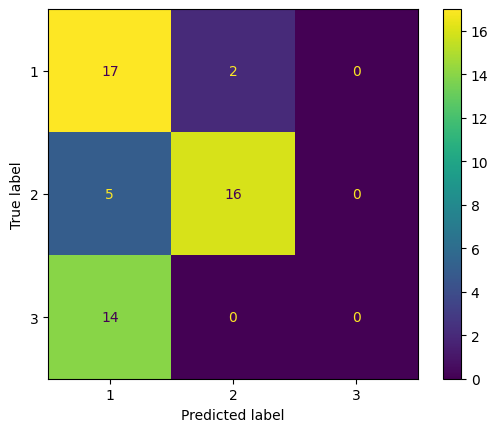

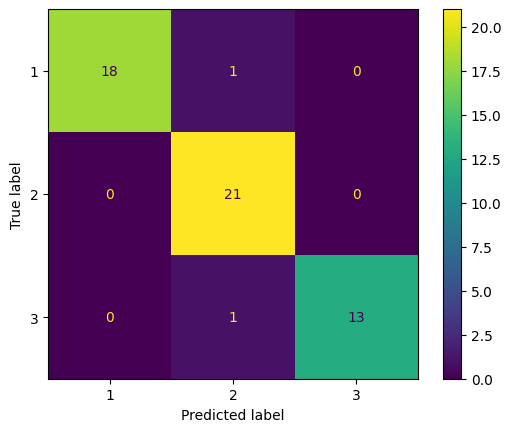

In [8]:
# Matriz de confusão para o modelo simples
cm_simple = confusion_matrix(y_test, y_pred_simple, labels=model_simple.classes_)
disp_simple = ConfusionMatrixDisplay(confusion_matrix=cm_simple, display_labels=model_simple.classes_)
disp_simple.plot()
plt.show()

# Matriz de confusão para o modelo complexo
cm_complex = confusion_matrix(y_test, y_pred_complex, labels=model_complex.classes_)
disp_complex = ConfusionMatrixDisplay(confusion_matrix=cm_complex, display_labels=model_complex.classes_)
disp_complex.plot()
plt.show()

## Discussão
- ***Underfitting***: O modelo simples não consegue capturar a complexidade dos dados, resultando em baixa acurácia tanto no treino quanto no teste.
- A profundidade máxima da árvore de decisão foi ajustada para 1, o que deve resultar em um modelo muito simples que não consegue capturar a complexidade dos dados.
```
Modelo Simples
Acurácia no conjunto de treino: 0.6612903225806451
Acurácia no conjunto de teste: 0.6111111111111112
```
- ***Overfitting***: O modelo complexo aprende muito bem os dados de treino, mas tem uma performance ruim nos dados de teste devido à alta variância.
- A profundidade máxima da árvore de decisão foi ajustada para 15, o que deve resultar em um modelo muito complexo que memoriza os dados de treino.
```
Modelo Complexo
Acurácia no conjunto de treino: 1.0
Acurácia no conjunto de teste: 0.9629629629629629
```

## Esperados Resultados
- **Modelo Simples**: Deve apresentar baixa acurácia tanto no conjunto de treino quanto no de teste, ilustrando *underfitting*.

- **Modelo Complexo**: Deve apresentar alta acurácia no conjunto de treino, mas significativamente menor no conjunto de teste, ilustrando *overfitting*.

>*zero_division=0*: Adicionado ao *classification_report* para evitar os avisos e definir precisão e *F-score* como 0.0 quando não há amostras previstas para determinadas classes.

O resultado do modelo complexo com acurácia de 1.0 no conjunto de treino e 0.9629 no conjunto de teste não é necessariamente ruim. No entanto, há algumas considerações importantes a serem feitas para determinar se o modelo está realmente bom ou se há problemas potenciais, como *overfitting*. Vamos analisar os pontos principais:

### Ponto Positivo:
1. **Alta Acurácia**: A alta acurácia no conjunto de teste (0.9629) sugere que o modelo está fazendo boas previsões em dados não vistos, o que é um bom sinal.

### **Pontos de Atenção**:
1. **Acurácia Perfeita no Treino**: A acurácia de 1.0 no conjunto de treino indica que o modelo está ajustando perfeitamente os dados de treino. Embora isso possa parecer ótimo, é muitas vezes um sinal de *overfitting*. O modelo pode ter memorizado os dados de treino, capturando até mesmo os ruídos, ao invés de aprender padrões generalizáveis.

2. **Diferença Entre Treino e Teste**: A pequena diferença entre as acurácias de treino e teste (1.0 e 0.9629, respectivamente) não é muito grande, o que geralmente é bom. No entanto, em situações reais, essa diferença deve ser monitorada. Uma diferença significativa indicaria que o modelo não está generalizando bem.

## Análise Detalhada:
Para entender melhor se o modelo complexo está *overfitting*, devemos considerar não apenas a acurácia, mas também outras métricas de desempenho, como a precisão, *recall* e a matriz de confusão, além de técnicas como validação cruzada.

## Executando o Código
Ao executar o código acima, você deve ver os resultados de acurácia e os relatórios de classificação, além das matrizes de confusão para ambos os modelos. Isso deve ajudar a visualizar e entender melhor os conceitos de *underfitting* e *overfitting*.

## Validação Cruzada:
A validação cruzada é uma técnica que divide os dados em múltiplos subconjuntos e treina/testa o modelo várias vezes, fornecendo uma média de desempenho que é uma melhor estimativa da capacidade de generalização do modelo.



In [6]:
# Validação cruzada para o modelo complexo
scores_complex = cross_val_score(model_complex, X, y, cv=5)
print("Validação Cruzada - Modelo Complexo: Média de Acurácia:", scores_complex.mean())

Validação Cruzada - Modelo Complexo: Média de Acurácia: 0.8709523809523809


## Importância das Métricas:
Além da acurácia, as seguintes métricas também são importantes:

- **Precision (Precisão)**: A proporção de verdadeiros positivos sobre o total de positivos previstos.
- **Recall (Revocação)**: A proporção de verdadeiros positivos sobre o total de positivos reais.
- **F1-Score**: A média harmônica entre precisão e recall.

## Conclusão
Este estudo de caso mostrou como construir e avaliar modelos de *Machine Learning* usando o *dataset* "Wine". Também exploramos os problemas de *overfitting* e *underfitting*, que são cruciais para o desenvolvimento de modelos robustos. A matriz de confusão foi utilizada para visualizar melhor a performance dos modelos.

## Próximos Passos
Nos próximos capítulos, exploraremos técnicas de regularização e outros algoritmos para melhorar a performance e a generalização dos modelos. Continue acompanhando e aprimorando suas habilidades para se tornar um cientista de dados competente e eficaz. E não se esqueça: **só depende de você**.

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
